# Data Loading and Cleaning

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [54]:
# Load the dataset
df = pd.read_excel('Online_retail_II.xlsx')

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())



Missing Values:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [55]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [56]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [ ]:

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Total Sales (Quantity * UnitPrice)
df['TotalSales'] = df['Quantity'] * df['Price']

# Extract Month-Year for trend analysis
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# **Descriptive statistics**

In [58]:
# Summary statistics
print("\nSummary Statistics:")
print(df[['Quantity', 'Price', 'TotalSales']].describe())

# Total Sales and Average Transaction Value
total_sales = df['TotalSales'].sum()
avg_transaction = df.groupby('Invoice')['TotalSales'].sum().mean()
print(f"\nTotal Sales: £{total_sales:,.2f}")
print(f"Average Transaction Value: £{avg_transaction:,.2f}")

# Number of transactions per month
monthly_transactions = df.groupby('MonthYear')['Invoice'].nunique()
print("\nMonthly Transactions:")
print(monthly_transactions)


Summary Statistics:
            Quantity          Price     TotalSales
count  525461.000000  525461.000000  525461.000000
mean       10.337667       4.688834      18.154506
std       107.424110     146.126914     160.333083
min     -9600.000000  -53594.360000  -53594.360000
25%         1.000000       1.250000       3.750000
50%         3.000000       2.100000       9.950000
75%        10.000000       4.210000      17.700000
max     19152.000000   25111.090000   25111.090000

Total Sales: £9,539,484.63
Average Transaction Value: £331.05

Monthly Transactions:
MonthYear
2009-12    2330
2010-01    1633
2010-02    1969
2010-03    2367
2010-04    1892
2010-05    2418
2010-06    2216
2010-07    2017
2010-08    1877
2010-09    2375
2010-10    2965
2010-11    3669
2010-12    1088
Freq: M, Name: Invoice, dtype: int64


In [ ]:
#df['TotalSales'] = pd.to_numeric(df['TotalSales'], errors='coerce')
print(df.dtypes)
print(df['TotalSales'].isnull().sum())


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalSales            float64
MonthYear           period[M]
dtype: object
0


In [ ]:

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,MonthYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


# **Data Visualization**

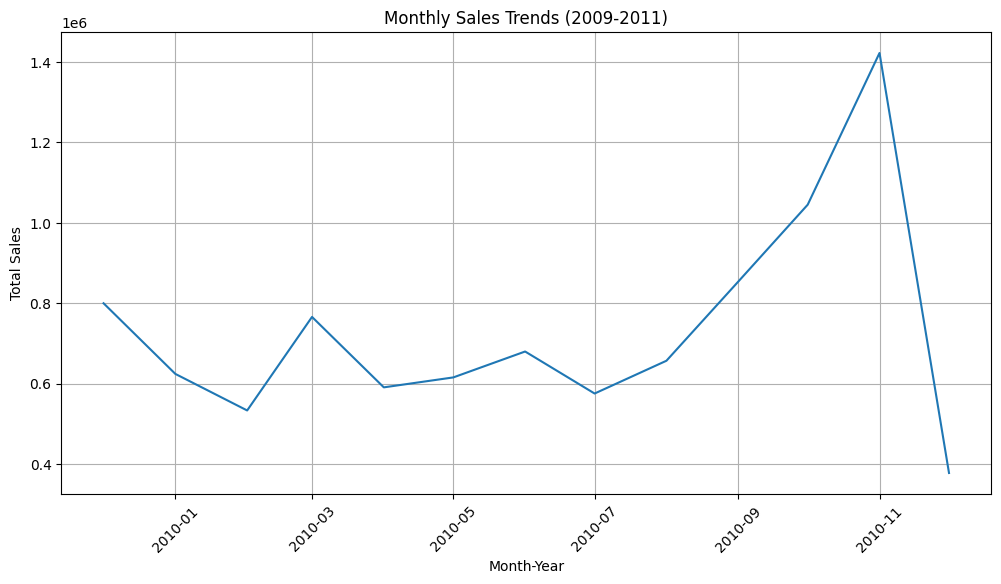

In [63]:
# Convert PeriodDtype to timestamp
df['MonthYear'] = df['MonthYear'].dt.to_timestamp()

# Group by month-year and sum total sales
monthly_sales = df.groupby('MonthYear')['TotalSales'].sum().reset_index()

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MonthYear', y='TotalSales')

# Formatting
plt.title("Monthly Sales Trends (2009-2011)")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8448\1130357111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


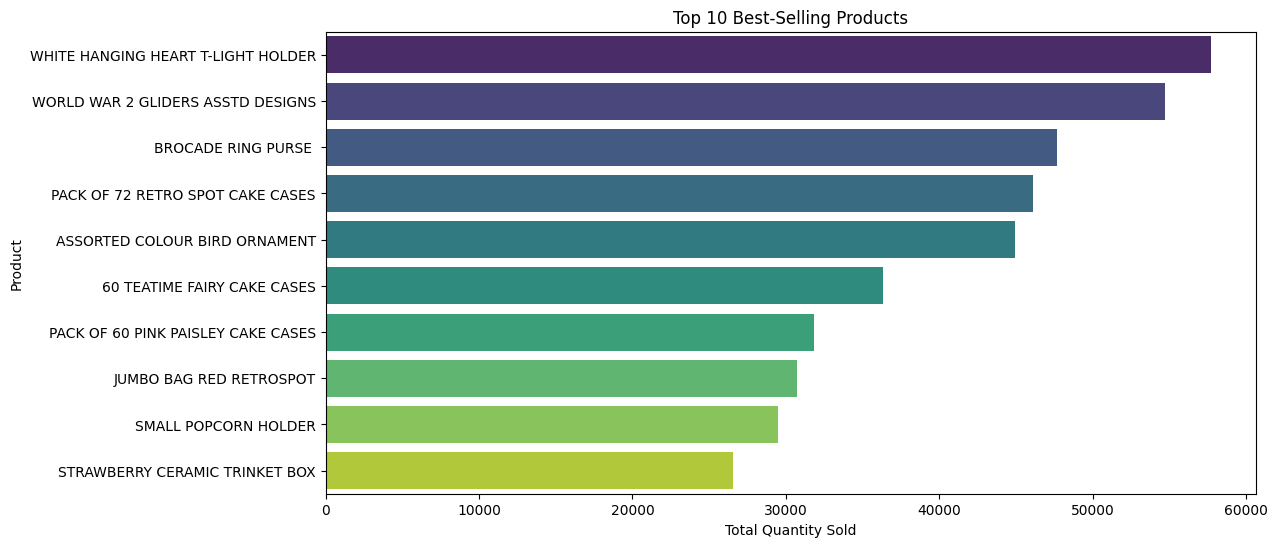

In [64]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()

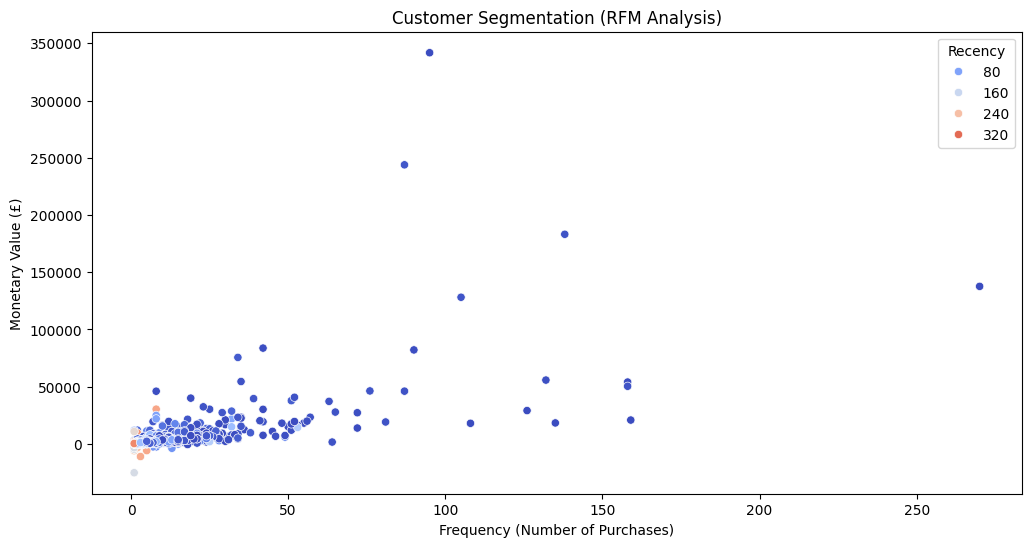

In [ ]:
# Recency, Frequency, Monetary (RFM) Analysis
from datetime import datetime

# Reference date 
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'TotalSales': 'sum'  # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalSales': 'Monetary'
})

# Plot RFM segments
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Recency', palette='coolwarm')
plt.title("Customer Segmentation (RFM Analysis)")
plt.xlabel("Frequency (Number of Purchases)")
plt.ylabel("Monetary Value (£)")
plt.show()